<a href="https://colab.research.google.com/github/Rohithtechis/INterview-Project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [250]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [251]:
train.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [252]:
train.shape

(8708, 11)

In [253]:
train.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [254]:
train.columns.values

array(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype=object)

In [255]:
# Ckecking for missing values
train.isna().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

In [256]:
# Replacing the Missing values with Mode

In [257]:
train.fillna(train.mean(), inplace=True)
train=train.fillna(train.mean())

In [258]:
train.isna().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

In [259]:
def timefeatures(train):
  train['datetime']=pd.to_datetime(train['timestamp'])
  train['day_of_week']=train['datetime'].dt.dayofweek
  train['day_of_year']=train['datetime'].dt.dayofyear
  train['month']=train['datetime'].dt.month
  train['hour']=train['datetime'].dt.hour
  return train

In [260]:
train=timefeatures(train)
train.drop(['timestamp','datetime'],axis=1,inplace=True)
train.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,6,1,1,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,6,1,1,1
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,6,1,1,2
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,6,1,1,3
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,6,1,1,4


In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8708 non-null   int64  
 1   season       8708 non-null   object 
 2   holiday      8708 non-null   object 
 3   workingday   8708 non-null   object 
 4   weather      8708 non-null   object 
 5   temp         8708 non-null   float64
 6   temp_feel    8708 non-null   float64
 7   humidity     8708 non-null   float64
 8   windspeed    8708 non-null   float64
 9   demand       8708 non-null   float64
 10  day_of_week  8708 non-null   int64  
 11  day_of_year  8708 non-null   int64  
 12  month        8708 non-null   int64  
 13  hour         8708 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 952.6+ KB


In [262]:
train.describe()

,id,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.993540,13.048589,4.452725,3.018948,149.825678,5.628388,11.545590
std,2513.927405,7.448937,8.686664,19.635766,8.215051,1.493963,2.003897,97.968074,3.220104,6.916298
min,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2177.750000,14.760000,16.665000,46.000000,7.001500,3.637586,1.000000,68.000000,3.000000,6.000000
50%,4354.500000,20.089454,24.240000,60.993540,12.998000,4.867534,3.000000,136.000000,5.000000,12.000000
75%,6531.250000,25.420000,31.060000,77.000000,19.001200,5.556828,5.000000,217.000000,8.000000,18.000000
max,8708.000000,41.000000,45.455000,100.000000,56.996900,6.792344,6.000000,353.000000,12.000000,23.000000


In [263]:
train.shape

(8708, 14)

In [264]:
train.isna().sum()

id             0
season         0
holiday        0
workingday     0
weather        0
temp           0
temp_feel      0
humidity       0
windspeed      0
demand         0
day_of_week    0
day_of_year    0
month          0
hour           0
dtype: int64

In [265]:
train.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,6,1,1,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,6,1,1,1
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,6,1,1,2
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,6,1,1,3
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,6,1,1,4


<function matplotlib.pyplot.show>

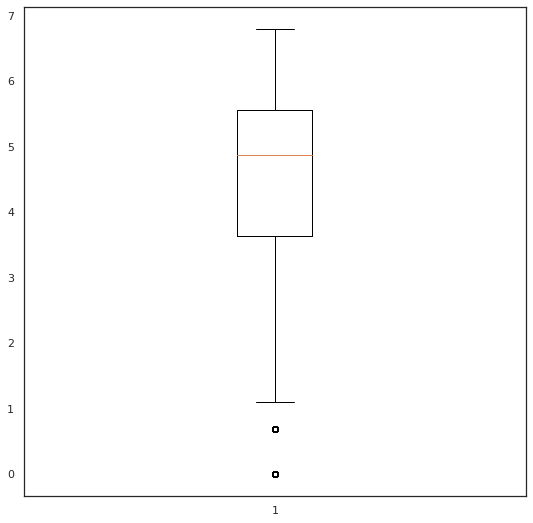

In [266]:
plt.figure(figsize=(9,9))
plt.boxplot(train['demand'])
plt.show


In [267]:
train_cat=train.select_dtypes(include='object')

In [268]:
train_cat.head()

,season,holiday,workingday,weather
0,spring,No,No,Clear or partly cloudy
1,spring,No,No,Clear or partly cloudy
2,spring,No,No,Clear or partly cloudy
3,spring,No,No,Clear or partly cloudy
4,spring,No,No,Clear or partly cloudy


In [269]:
# Implimenting the Dummies for Categorical variables
train_cat2=train
for cols in train_cat:
  dummies =pd.get_dummies(train[cols],drop_first=True)
  train_cat2 = pd.concat([train_cat2,dummies],axis='columns')

In [270]:
train_cat2.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day_of_week,day_of_year,month,hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589,6,1,1,0,1,0,0,0,0,0,0,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879,6,1,1,1,1,0,0,0,0,0,0,0
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736,6,1,1,2,1,0,0,0,0,0,0,0
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949,6,1,1,3,1,0,0,0,0,0,0,0
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000,6,1,1,4,1,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


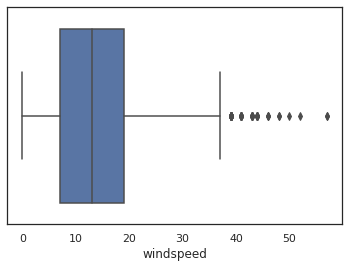

In [271]:
sns.boxplot(train_cat2['windspeed'])

In [272]:
Q1 = np.percentile(train_cat2['windspeed'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(train_cat2['windspeed'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(train_cat2['windspeed'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -10.99805
upper limit: 37.00075
